In [ ]:
# https://blog.naver.com/kimsjpk/222258102452

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# MMCV : 컴퓨터 비전을 위한 OpenMMKab 기본 라이브러리

# Install mmdetection # MMDetection : openMMLab 이미지 분류 툴박스 및 벤치마크
!rm -rf mmdetection 
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 27kB/s 
     |████████████████████████████████| 6.7MB 36.1MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.5.1+cu101 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
     |████████████████████████████████| 296kB 7.7MB/s 
     |████████████████████████████████| 194kB 13.1MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.4-cp37-cp37m-linux_x86_64.whl size=25011648 sha256=954dc2978b9727a20ad314c3dea70a5f13580b7bb1aa202f3c0fe52bd802c3cc
  Stored in directory: /root/.cache/pip/wheels/d4/39/64/573a0673de0ee0c6b699dddfae8232d485ea8da749caa198fd
Successfully built mmcv-full
Clonin

In [ ]:
!pip install matplotlib-venn
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Requirement already up-to-date: libarchive in /usr/local/lib/python3.7/dist-packages (0.4.7)


In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.5.1+cu101 True
2.12.0
11.0
GCC 7.5


In [ ]:
!mkdir checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/cornernet/cornernet_hourglass104_mstest_10x5_210e_coco/cornernet_hourglass104_mstest_10x5_210e_coco_20200824_185720-5fefbf1c.pth \
      -O checkpoints/cornernet_hourglass104_mstest_10x5_210e_coco_20200824_185720-5fefbf1c.pth

--2021-05-17 08:55:10--  http://download.openmmlab.com/mmdetection/v2.0/cornernet/cornernet_hourglass104_mstest_10x5_210e_coco/cornernet_hourglass104_mstest_10x5_210e_coco_20200824_185720-5fefbf1c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.225
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 804865158 (768M) [application/octet-stream]
Saving to: ‘checkpoints/cornernet_hourglass104_mstest_10x5_210e_coco_20200824_185720-5fefbf1c.pth’

checkpoints/cornern 100%[===================>] 767.58M  8.26MB/s    in 96s     

2021-05-17 08:56:48 (8.02 MB/s) - ‘checkpoints/cornernet_hourglass104_mstest_10x5_210e_coco_20200824_185720-5fefbf1c.pth’ saved [804865158/804865158]



In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = 'configs/cornernet/cornernet_hourglass104_mstest_10x5_210e_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/cornernet_hourglass104_mstest_10x5_210e_coco_20200824_185720-5fefbf1c.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

Use load_from_local loader


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Use the detector to do inference
img = '/content/drive/My Drive/cp/datasets/2.jpg'
result = inference_detector(model, img)
# Let's plot the result
classes = ('person')
show_result_pyplot(model, img, result, score_thr=0.3, classes)

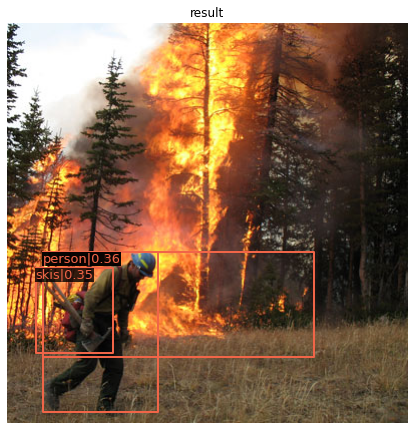

In [ ]:
# Use the detector to do inference
img = '/content/drive/My Drive/cp/datasets/4.png'
result = inference_detector(model, img)
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

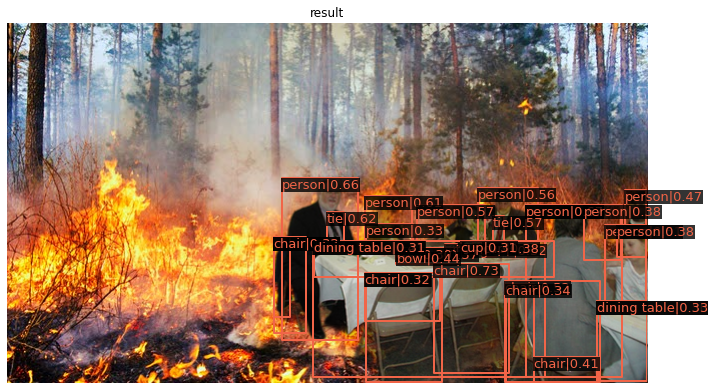

In [ ]:
# Use the detector to do inference
img = '/content/drive/My Drive/cp/data/pf.png'
result = inference_detector(model, img)
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


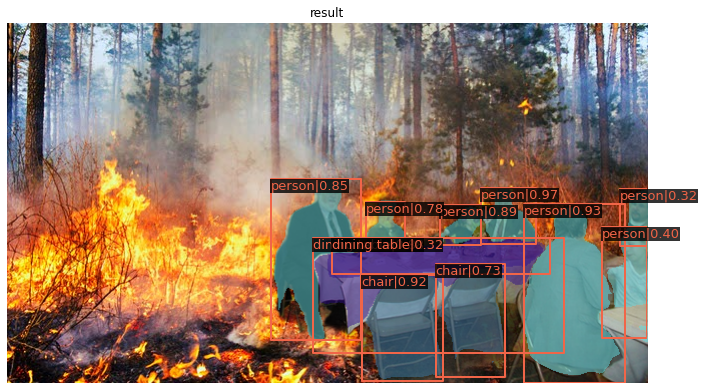

In [ ]:
# Use the detector to do inference
img = '/content/drive/My Drive/cp/data/pf.png'
result = inference_detector(model, img)
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)